In [9]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('./data/clean/df_clean.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.reset_index(drop=True).sort_values(by='DATE')
df = df[['DATE', 'HTEURNEIGE_Q']]

In [30]:
# df = df.set_index('DATE').asfreq('D')

In [31]:
# df['HTEURNEIGE_Q'] = df['HTEURNEIGE_Q'].fillna(0)

In [32]:
df_prophet = df.reset_index(drop=True).rename(columns={'DATE': 'ds', 'HTEURNEIGE_Q': 'y'})

In [37]:
split_date = '2020-01-01'
train = df_prophet[df_prophet['ds'] < split_date]
test = df_prophet[df_prophet['ds'] >= split_date]

In [38]:
model = Prophet()
model.fit(train)

11:45:12 - cmdstanpy - INFO - Chain [1] start processing
11:45:13 - cmdstanpy - INFO - Chain [1] done processing


In [39]:
future = model.make_future_dataframe(periods=len(test), freq='D')
forecast = model.predict(future)

In [41]:
# Merge forecast with actual test data
forecast_eval = forecast[['ds', 'yhat']].merge(test, on='ds')

from sklearn.metrics import mean_absolute_error, root_mean_squared_error

mae = mean_absolute_error(forecast_eval['y'], forecast_eval['yhat'])
rmse = root_mean_squared_error(forecast_eval['y'], forecast_eval['yhat'])

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

MAE: 0.0734
RMSE: 0.1019


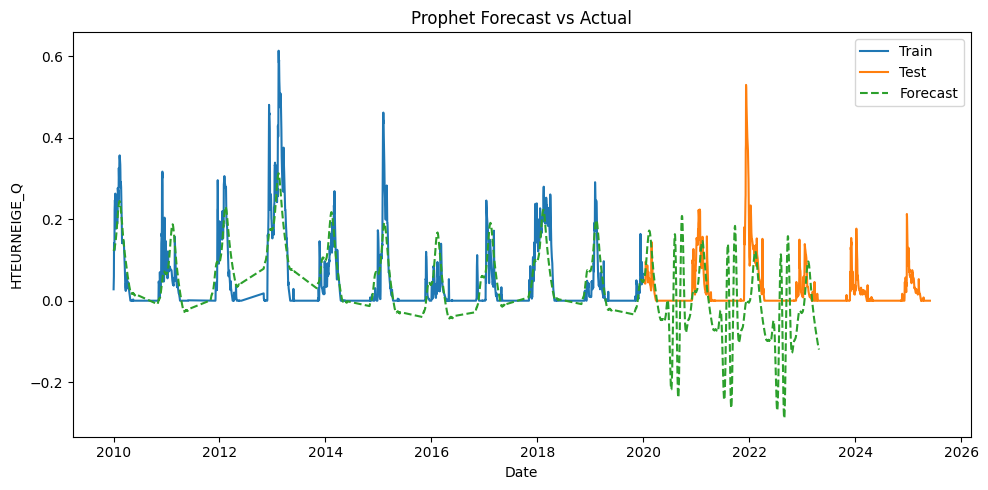

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train['ds'], train['y'], label='Train')
plt.plot(test['ds'], test['y'], label='Test')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', linestyle='--')
plt.legend()
plt.title("Prophet Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("HTEURNEIGE_Q")
plt.tight_layout()
plt.show()